<a href="https://colab.research.google.com/github/osohyun0224/BigData-Final-Project/blob/master/MedicalData_Analyze_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
system("gdown --id 1GIaHWMhNmtB6AzJL77DmtO_qY2yVTQtS")
system("ls", TRUE)

[1] "healthcare_dataset.csv" "sample_data"

In [ ]:
data <- read.csv("healthcare_dataset.csv")

In [ ]:
str(data)

'data.frame':	10000 obs. of  15 variables:
 $ Name              : chr  "Tiffany Ramirez" "Ruben Burns" "Chad Byrd" "Antonio Frederick" ...
 $ Age               : int  81 35 61 49 51 41 82 55 33 39 ...
 $ Gender            : chr  "Female" "Male" "Male" "Male" ...
 $ Blood.Type        : chr  "O-" "O+" "B-" "B-" ...
 $ Medical.Condition : chr  "Diabetes" "Asthma" "Obesity" "Asthma" ...
 $ Date.of.Admission : chr  "2022-11-17" "2023-06-01" "2019-01-09" "2020-05-02" ...
 $ Doctor            : chr  "Patrick Parker" "Diane Jackson" "Paul Baker" "Brian Chandler" ...
 $ Hospital          : chr  "Wallace-Hamilton" "Burke, Griffin and Cooper" "Walton LLC" "Garcia Ltd" ...
 $ Insurance.Provider: chr  "Medicare" "UnitedHealthcare" "Medicare" "Medicare" ...
 $ Billing.Amount    : num  37491 47304 36875 23303 18086 ...
 $ Room.Number       : int  146 404 292 480 477 180 161 384 215 310 ...
 $ Admission.Type    : chr  "Elective" "Emergency" "Emergency" "Urgent" ...
 $ Discharge.Date    : chr  "2022-12

In [ ]:
install.packages("tidyverse")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
library(repr)

In [ ]:
df <- fread("healthcare_dataset.csv") %>% as_tibble()

In [ ]:
summary(df)

     Name                Age           Gender           Blood Type       
 Length:10000       Min.   :18.00   Length:10000       Length:10000      
 Class :character   1st Qu.:35.00   Class :character   Class :character  
 Mode  :character   Median :52.00   Mode  :character   Mode  :character  
                    Mean   :51.45                                        
                    3rd Qu.:68.00                                        
                    Max.   :85.00                                        
 Medical Condition  Date of Admission       Doctor            Hospital        
 Length:10000       Min.   :2018-10-30   Length:10000       Length:10000      
 Class :character   1st Qu.:2020-02-10   Class :character   Class :character  
 Mode  :character   Median :2021-05-02   Mode  :character   Mode  :character  
                    Mean   :2021-05-01                                        
                    3rd Qu.:2022-07-23                                        
        

# 로지스틱 회귀 분석
## 귀무가설: 환자의 나이, 성별, 의학적 상태는 병원 퇴원 후 재입원 가능성에 영향을 미치지 않는다.<br/>
## 대립가설: 환자의 나이, 성별, 의학적 상태는 병원 퇴원 후 재입원 가능성에 영향을 미친다.


In [ ]:
library(tidyverse)
install.packages("rsample")
library(rsample)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’




In [ ]:
df <- read.csv("healthcare_dataset.csv")

In [ ]:
# 'Gender'와 'Medical Condition'을 팩터로 변환합니다.
df$Gender <- factor(df$Gender)
df$Medical.Condition <- factor(df$Medical.Condition)

In [ ]:
# 재입원 여부에 대한 변수가 실제 데이터에 없다면, 이를 생성해야 합니다.
# 이 예에서는 Discharge Date를 기준으로 일정 기간 후 데이터 마지막 날짜보다 전이면 재입원으로 가정합니다.
# 이 부분은 실제 데이터에 맞게 조정해야 합니다.
last_date <- max(df$Discharge.Date, na.rm = TRUE)
df$ReAdmission <- ifelse(df$Discharge.Date < last_date, 1, 0)

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
set.seed(42) # 재현 가능한 결과를 위해
data_split <- initial_split(df, prop = 0.7)
train_data <- training(data_split)
test_data <- testing(data_split)

In [ ]:
# 'Gender'와 'Medical Condition'을 팩터로 변환합니다.
set.seed(42) # 재현 가능한 결과를 위해
df$ReAdmission <- rbinom(n = nrow(df), size = 1, prob = 0.3) # 재입원 확률을 30%로 가정

In [ ]:
# 'ReAdmission' 이진 종속 변수 생성
# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
set.seed(42)
data_split <- initial_split(df, prop = 0.7)
train_data <- training(data_split)
test_data <- testing(data_split)


In [ ]:
# 로지스틱 회귀 모델을 구축하고 학습합니다.
logistic_model <- glm(ReAdmission ~ Age + Gender + Medical.Condition,
                      data = train_data, family = binomial)

In [ ]:
# 모델의 요약을 출력합니다.
summary(logistic_model)


Call:
glm(formula = ReAdmission ~ Age + Gender + Medical.Condition, 
    family = binomial, data = train_data)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -0.8418787  0.0978861  -8.601   <2e-16 ***
Age                            0.0001278  0.0013375   0.096   0.9239    
GenderMale                     0.0267398  0.0521737   0.513   0.6083    
Medical.ConditionAsthma        0.0017696  0.0895417   0.020   0.9842    
Medical.ConditionCancer       -0.0208257  0.0900047  -0.231   0.8170    
Medical.ConditionDiabetes     -0.0521453  0.0917014  -0.569   0.5696    
Medical.ConditionHypertension  0.0781241  0.0893206   0.875   0.3818    
Medical.ConditionObesity      -0.1539772  0.0921992  -1.670   0.0949 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 8558.9  on 6999  degrees of freedom
Residual deviance: 8551.5  on 6992 

In [ ]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


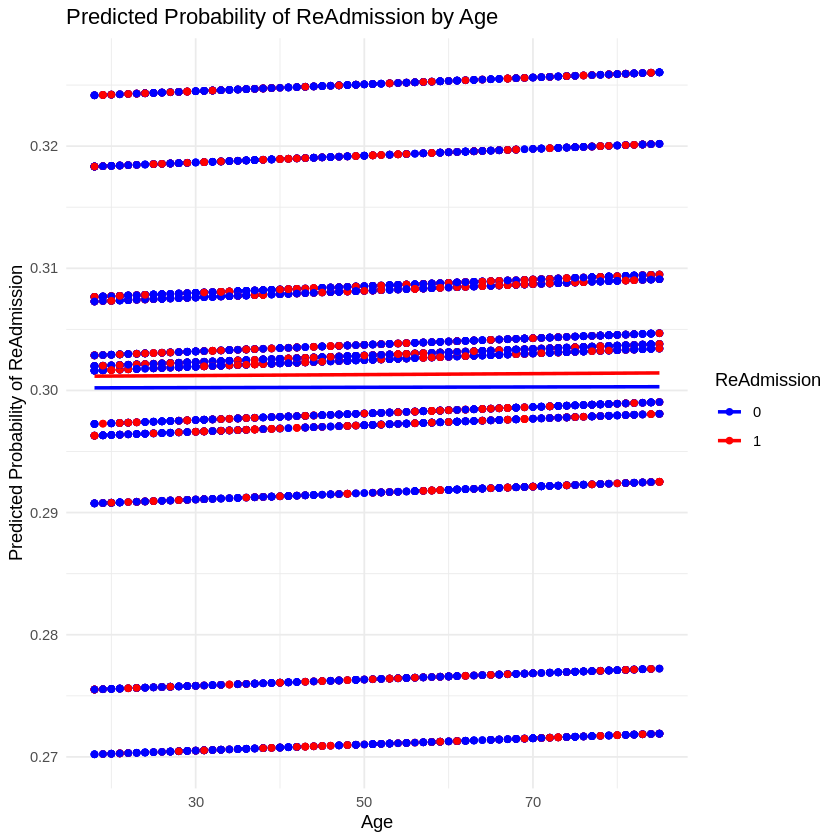

In [ ]:
# ReAdmission을 팩터로 변환합니다.
train_data$ReAdmission <- factor(train_data$ReAdmission)

# 예측 확률을 계산합니다.
train_data$predicted_prob <- predict(logistic_model, train_data, type = "response")

# Age와 예측 확률에 대한 그래프를 그립니다.
ggplot(train_data, aes(x = Age, y = predicted_prob, color = ReAdmission)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, aes(y = predicted_prob)) +
  scale_color_manual(values = c("blue", "red")) +
  labs(title = "Predicted Probability of ReAdmission by Age",
       x = "Age",
       y = "Predicted Probability of ReAdmission") +
  theme_minimal()


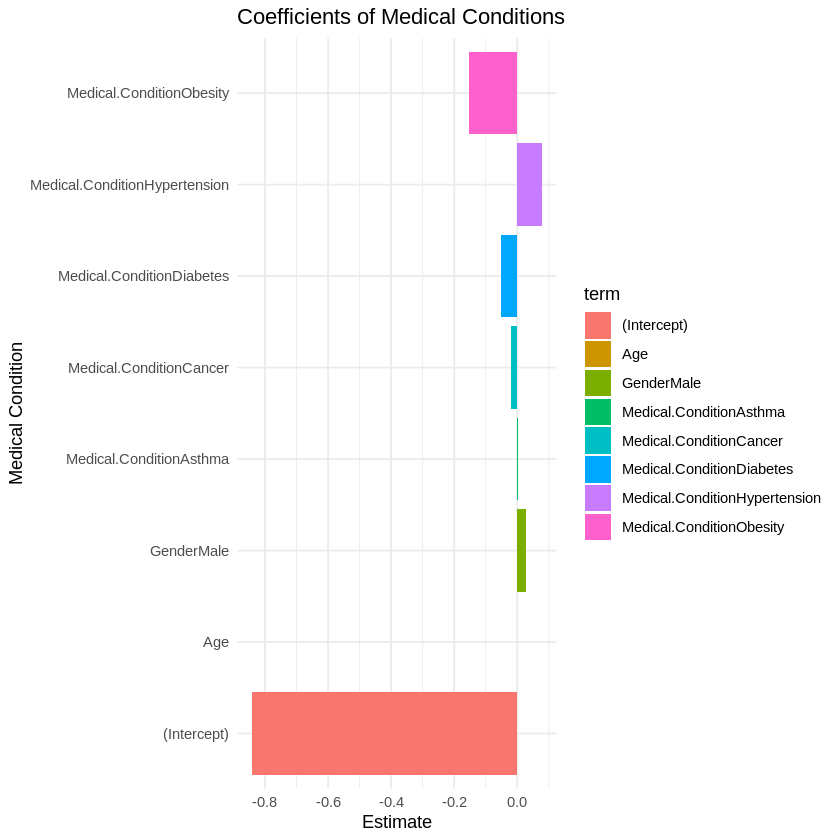

In [ ]:
# 모델의 계수를 데이터 프레임으로 변환합니다.
coef_df <- broom::tidy(logistic_model)

# Medical Conditions 계수에 대한 바 그래프를 그립니다.
ggplot(coef_df, aes(x = term, y = estimate)) +
  geom_bar(stat = "identity", aes(fill = term)) +
  coord_flip() + # x 축과 y 축을 뒤집습니다.
  labs(title = "Coefficients of Medical Conditions",
       x = "Medical Condition",
       y = "Estimate") +
  theme_minimal()


## 테스트 데이터로 진행

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


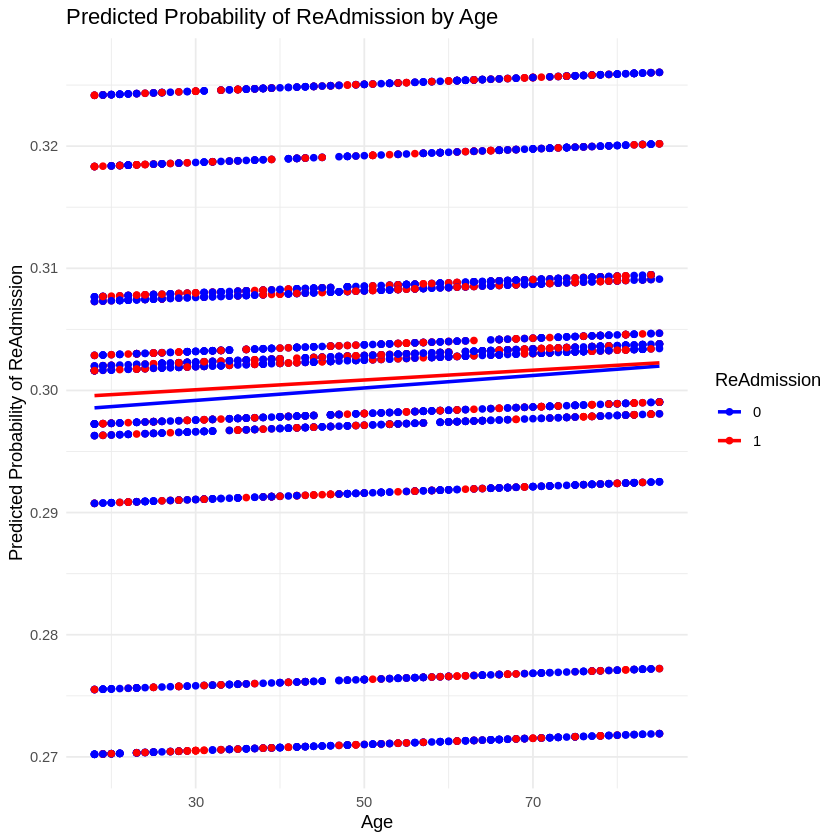

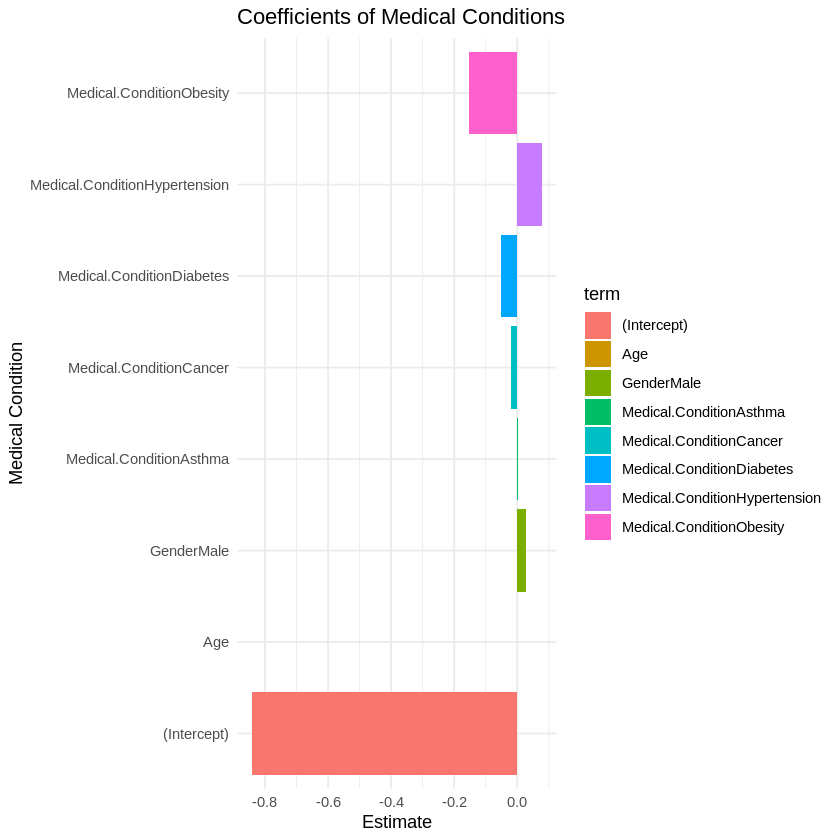

In [ ]:
# ReAdmission을 팩터로 변환합니다.
test_data$ReAdmission <- factor(test_data$ReAdmission)

# 예측 확률을 계산합니다.
test_data$predicted_prob <- predict(logistic_model, test_data, type = "response")

# Age와 예측 확률에 대한 그래프를 그립니다.
ggplot(test_data, aes(x = Age, y = predicted_prob, color = ReAdmission)) +
  geom_point() +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, aes(y = predicted_prob)) +
  scale_color_manual(values = c("blue", "red")) +
  labs(title = "Predicted Probability of ReAdmission by Age",
       x = "Age",
       y = "Predicted Probability of ReAdmission") +
  theme_minimal()

# 모델의 계수를 데이터 프레임으로 변환합니다.
coef_df <- broom::tidy(logistic_model)

# Medical Conditions 계수에 대한 바 그래프를 그립니다.
ggplot(coef_df, aes(x = term, y = estimate)) +
  geom_bar(stat = "identity", aes(fill = term)) +
  coord_flip() + # x 축과 y 축을 뒤집습니다.
  labs(title = "Coefficients of Medical Conditions",
       x = "Medical Condition",
       y = "Estimate") +
  theme_minimal()